Image raw size :
 350 524 4
Image gray size :
 350 524


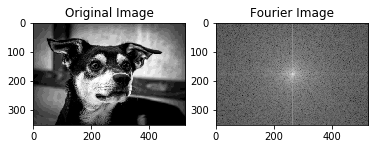

In [190]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

img = Image.open('dog.png')
img_in = np.array(img)
img_dim= np.size(img_in.shape)

#Make image to 1 channel graysclae image
if(img_dim==3):
    height,width,depth = img_in.shape
    print('Image raw size :\n',height,width,depth)
    #convert 3D image to 2D image
    img_in=img_in[:,:,0]
    height,width = img_in.shape
    print('Image gray size :\n',height,width)
    
else:
    height,width = img_in.shape
    print('Image gray size :\n',height,width)
    

#DFT Formula
def iexp(n):
    return complex(math.cos(n), math.sin(n))

def dft(xs):
    n = len(xs)
    return [sum((xs[k] * iexp(-2 * math.pi * i * k / n) for k in range(n)))
            for i in range(n)]

row = np.transpose(img_in)
fourier_row = np.asarray(dft(row))

column = np.transpose(fourier_row)
fourier_column = np.asarray(dft(column))
    
# compute the common logarithm of each value to reduce the dynamic range
fourier = 20*np.log(np.abs(fourier_column))

# normalize the Fourier image data 
lowest = np.nanmin(fourier[np.isfinite(fourier)])
highest = np.nanmax(fourier[np.isfinite(fourier)])
original_range = highest - lowest
norm_fourier = (fourier - lowest) / original_range * 255

#Shift The DC-value (i.e. F(0,0)) to the center
imheight,imwidth=norm_fourier.shape
height = imheight//2
width = imwidth//2

p1 = norm_fourier[:int(height),:int(width)]
p2= norm_fourier[int(height):,:int(width)]
p3= norm_fourier[:int(height),int(width):]
p4 = norm_fourier[int(height):,int(width):]
part1 = np.concatenate((p4,p3))
part2 = np.concatenate((p2,p1))
shifted_img = np.concatenate((part1,part2), axis=1)

# convert the normalized data into an image
norm_fourier_img = Image.fromarray(shifted_img.astype(np.uint8))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img, cmap='gray')
ax2.imshow(norm_fourier_img, cmap='gray')
ax1.title.set_text('Original Image')
ax2.title.set_text('Fourier Image')
plt.show()

norm_fourier_img.show()





In [170]:
print((imheight))

350
